# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd  # 文字数を節約
%matplotlib inline

!ls

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",
                   na_values=[0, 'Unknown', 'UNKNOWN'],
                   parse_dates=['Application Date','License Issued Date', 'License Expired Date', 'Animal Birth'],
                    nrows=30000) # None 
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
len(df), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29539 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3974 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  object

(30000, None)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Pets list. These pets are licensed in some way. Each row is a pet owned by someone and applied for licence after 2015.
 
 Following columns have just literal meaning.
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29742 non-null  object 

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1. Is this a list on a specific state?
2. What do they mean by three similar columns Animal Dominant Color, Animal Secondary Color	Animal Third Color?
3. Primary Breed	Secondary Breed. What are these?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [4]:
df.value_counts('Primary Breed').head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [5]:
df.value_counts('Primary Breed').head(10)

Primary Breed
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: count, dtype: int64

## What are the most popular dog names?

In [6]:
df.value_counts('Animal Name').head(1)

Animal Name
Max    202
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [7]:
def name_check(name):
    return len(df.query('`Animal Name` == "{}"'.format(name)))
name_check('Takayuki')

0

In [8]:
name_check('Max')

202

In [9]:
name_check('Maxwell')

11

## What percentage of dogs are guard dogs?

In [10]:
df['Guard or Trained'].value_counts(normalize=True, dropna=False)

Guard or Trained
No     0.660300
NaN    0.339133
Yes    0.000567
Name: proportion, dtype: float64

## What are the actual numbers?

In [11]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [12]:
# I already solved this above

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [13]:
df['Guard or Trained'] = df['Guard or Trained'].fillna('No')
df['Guard or Trained'].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

In [14]:
#df['Guard or Trained'] = df.loc[df['Guard or Trained'] is
#df['Guard or Trained'] = df[df['Guard or Trained'].isna()]

# locを使えない
#df['Guard or Trained'] = df['Guard or Trained'].astype(str)

#df['Guard or Trained'].value_counts()
#df.head()

In [15]:
#df.loc[df['Guard or Trained']]
#df.loc[df['Guard or Trained'].isnull()]
#df['Guard or Trained'].isna().value_counts()
#df['Guard or Trained'].value_counts()

## What are the top dog breeds for guard dogs? 

In [16]:
df.query('`Guard or Trained` == "Yes"')['Primary Breed'].value_counts().head(1)

Primary Breed
German Shepherd Dog    3
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [17]:
df['year'] = 0
df['year'] = df['Animal Birth'].dt.year
#df['Animal Birth'].
df['year'].describe()

count    30000.000000
mean      2009.287567
std          4.066803
min       1984.000000
25%       2006.000000
50%       2010.000000
75%       2013.000000
max       2015.000000
Name: year, dtype: float64

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [18]:
df['age'] = 2024 - df['year']
df['age'].describe() # mean is 14

count    30000.000000
mean        14.712433
std          4.066803
min          9.000000
25%         11.000000
50%         14.000000
75%         18.000000
max         40.000000
Name: age, dtype: float64

# Joining data together

In [19]:
# I thought this section irrelevant, so skipped this section.

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [20]:
df_prison = pd.read_csv("zipcodes-neighborhoods.csv") # csvファイルのパス
                 #sep="\t", # tabをseparator
                 #encoding="iso8859-1", # encode
                #na_values=[0],
                #parse_dates=['Treatment_Date']) # None 
df_prison.head() 

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [21]:
merged = df_prison.merge(df, left_on='zip', right_on='Owner Zip Code', how = 'right')

len(merged[merged['neighborhood'].isnull() == False]), len(merged[merged['neighborhood'].isnull() == True])

merged['neighborhood'].value_counts(dropna=False).head()

neighborhood
Upper West Side        2000
Upper East Side        1851
Northwest Brooklyn     1716
Chelsea and Clinton    1533
South Shore            1375
Name: count, dtype: int64

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [22]:
def mostpop(area):
    #merged.query('neighborhood == {}'.format(area))
    return merged[merged['neighborhood'].str.contains(area, na=False)].value_counts('Animal Name').head(1)
    
mostpop('Bronx')

Animal Name
Bella    15
Name: count, dtype: int64

In [23]:
name_list = ['Bronx', 'Brooklyn', 'Upper East Side']
for item in name_list:
    print(item, mostpop(item))

Bronx Animal Name
Bella    15
Name: count, dtype: int64
Brooklyn Animal Name
Max    28
Name: count, dtype: int64
Upper East Side Animal Name
Charlie    19
Name: count, dtype: int64


## What is the most common dog breed in each of the neighborhoods of NYC?

In [24]:
#neighborhoods = merged['neighborhood'].drop_duplicates().tolist()
#neighborhoods
# merged.groupby('neighborhood').value_counts('Primary Breed') # ValueError: Keys {'i', 'P', ' ', 'r', 'B', 'e', 'y', 'm', 'a', 'd'} in subset do not exist in the DataFrame.

# merged.groupby('neighborhood')['Primary Breed'].value_counts()

# 各 'neighborhood' で 'Primary Breed' の出現回数をカウントし、最も多いものだけを返す
top_breeds = merged.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)
top_breeds

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [25]:
df.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True)

Primary Breed                 Spayed or Neut
Affenpinscher                 No                0.600000
                              Yes               0.400000
Afghan Hound                  Yes               0.800000
                              No                0.200000
Airedale Terrier              Yes               0.750000
                                                  ...   
Xoloitzcuintli                Yes               1.000000
Yorkshire Terrier             Yes               0.714665
                              No                0.285335
Yorkshire Terrier Crossbreed  Yes               0.545455
                              No                0.454545
Name: proportion, Length: 428, dtype: float64

In [26]:
# 去勢・避妊のデータを計算
spay_neuter_rates = df.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).unstack()

spay_neuter_rates

Spayed or Neut,No,Yes
Primary Breed,,
Affenpinscher,0.600000,0.400000
Afghan Hound,0.200000,0.800000
Airedale Terrier,0.250000,0.750000
Akita,0.189189,0.810811
Akita Crossbreed,0.176471,0.823529
...,...,...
Wire Fox Terrier,0.191489,0.808511
Wirehaired Pointing Griffon,0.500000,0.500000
Xoloitzcuintli,NaN,1.000000


In [27]:
type(spay_neuter_rates)

pandas.core.frame.DataFrame

In [28]:
# 'No'の割合だけを抽出して、降順にソート
least_spayed_or_neutered = spay_neuter_rates['No'].sort_values(ascending=False).copy()

# 上位のデータを表示
print(least_spayed_or_neutered.head())


Primary Breed
Mudi                         1.0
Mastiff, Tibetan             1.0
Dogo Argentino               1.0
Treeing Tennessee Brindle    1.0
Karelian Bear Dog            1.0
Name: No, dtype: float64


## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

In [29]:
merged.head()

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,Upper West Side,10024.0,Manhattan,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19,2007,17
1,Southeast Bronx,10461.0,Bronx,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20,2013,11
2,Greenwich Village and Soho,10013.0,Manhattan,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12,2014,10
3,Upper West Side,10025.0,Manhattan,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20,2008,16
4,Greenwich Village and Soho,10013.0,Manhattan,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12,2014,10


<Axes: ylabel='borough'>

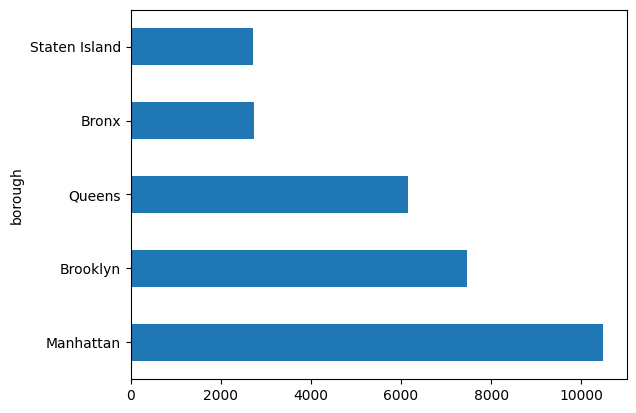

In [30]:
merged.value_counts('borough').plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [31]:
!ls

Dataset TWO - Dogs.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


In [32]:
pop_df = pd.read_csv("boro_population.csv")

In [44]:
pop_df

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [39]:
merged2 = pop_df.merge(merged, left_on='borough', right_on='borough', how = 'right')
len(merged2)

30000

In [40]:
merged2.head()

,borough,population,area_sqmi,neighborhood,zip,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,...,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,Manhattan,1644518.0,23.0,Upper West Side,10024.0,10024,BLUE MACK,M,NaN,AIREDALE TERR,...,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19,2007,17
1,Bronx,1455444.0,42.0,Southeast Bronx,10461.0,10461,Indie Zephir,M,Rottweiler,NaN,...,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20,2013,11
2,Manhattan,1644518.0,23.0,Greenwich Village and Soho,10013.0,10013,Bilal,M,Australian Cattledog,NaN,...,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12,2014,10
3,Manhattan,1644518.0,23.0,Upper West Side,10025.0,10025,Buddy,M,NaN,Cockapoo,...,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20,2008,16
4,Manhattan,1644518.0,23.0,Greenwich Village and Soho,10013.0,10013,Ali,M,Basenji,NaN,...,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12,2014,10


In [45]:
merged2.value_counts('borough') /merged2['borough']['population']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
                ... 
Bronx            NaN
Brooklyn         NaN
Manhattan        NaN
Queens           NaN
Staten Island    NaN
Length: 30005, dtype: object

In [52]:
# 各boroughの犬の数をカウント
dog_counts = merged2['borough'].value_counts()
print(type(dog_counts))
dog_counts.head()

<class 'pandas.core.series.Series'>


borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

In [53]:

# 各boroughの人口を取得（重複排除）
population = merged2.drop_duplicates(subset='borough').set_index('borough')['population']
print(type(population))
population.head()

<class 'pandas.core.series.Series'>


borough
Manhattan        1644518.0
Bronx            1455444.0
Brooklyn         2636735.0
Staten Island     474558.0
Queens           2339150.0
Name: population, dtype: float64

In [57]:
# 犬の数を人口で割る
dogs_per_person = dog_counts / population

# 結果を表示
print(dogs_per_person.sort_values(ascending=False)) # Manhattan is the highest

borough
Manhattan        0.006371
Staten Island    0.005746
Brooklyn         0.002832
Queens           0.002631
Bronx            0.001888
NaN                   NaN
dtype: float64


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [58]:
merged.head()

,neighborhood,zip,borough,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,Upper West Side,10024.0,Manhattan,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647000,2015-09-19,2016-09-19,2007,17
1,Southeast Bronx,10461.0,Bronx,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647000,2014-09-20,2018-09-20,2013,11
2,Greenwich Village and Soho,10013.0,Manhattan,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713000,2014-09-12,2019-09-12,2014,10
3,Upper West Side,10025.0,Manhattan,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417000,2014-09-12,2017-10-20,2008,16
4,Greenwich Village and Soho,10013.0,Manhattan,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707000,2014-09-12,2019-09-12,2014,10


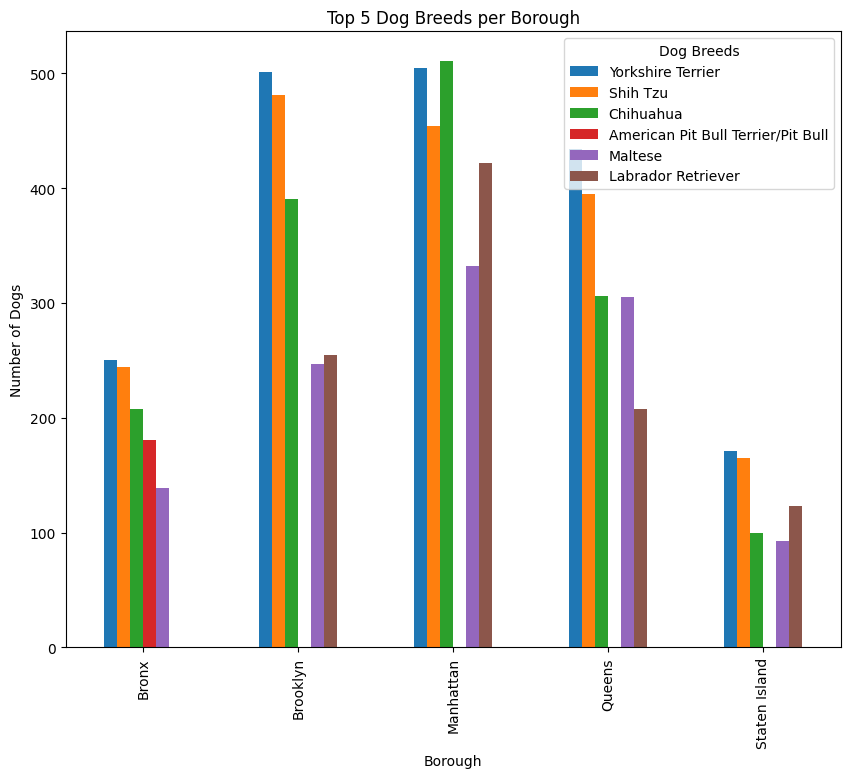

In [60]:
import matplotlib.pyplot as plt
top_breeds_per_borough = merged.groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head(5)

# グラフ描画の準備
fig, ax = plt.subplots(figsize=(10, 8))

# 上位5位の犬種のデータを棒グラフで描画
top_breeds_per_borough.unstack().plot(kind='bar', ax=ax)

# タイトルとラベルの設定
ax.set_title('Top 5 Dog Breeds per Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Dogs')

# 凡例を表示
ax.legend(title='Dog Breeds')

# グラフを表示
plt.show()